In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [2]:
df = pd.read_csv('pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.shape

(48620, 12)

In [4]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
df.describe(include = 'all')

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,26-11-2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [8]:
# Convert date and time
df['order_date'] = pd.to_datetime(df['order_date'], format="%d-%m-%Y")
df['order_time'] = pd.to_datetime(df['order_time']).dt.time

C:\Users\Narasimhan.Dinesh\AppData\Local\Temp\ipykernel_4080\2385503630.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time']).dt.time


In [9]:
df['order_date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

In [10]:
df['order_time'].head()

0    11:38:36
1    11:57:40
2    11:57:40
3    11:57:40
4    11:57:40
Name: order_time, dtype: object

In [11]:
# KPI CALCULATIONS
total_revenue = df['total_price'].sum()
total_orders = df['order_id'].nunique()
total_pizzas_sold = df['quantity'].sum()
avg_order_value = total_revenue / total_orders

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Total Pizzas Sold:", total_pizzas_sold)
print("Average Order Value:", round(avg_order_value, 2))

Total Revenue: 817860.05
Total Orders: 21350
Total Pizzas Sold: 49574
Average Order Value: 38.31


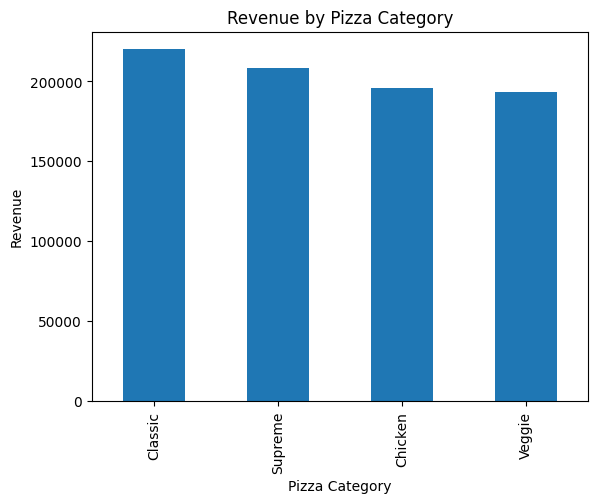

In [12]:
# REVENUE BY PIZZA CATEGORY
category_revenue = (df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False))

plt.figure()
category_revenue.plot(kind='bar')
plt.title("Revenue by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Revenue")
plt.show()

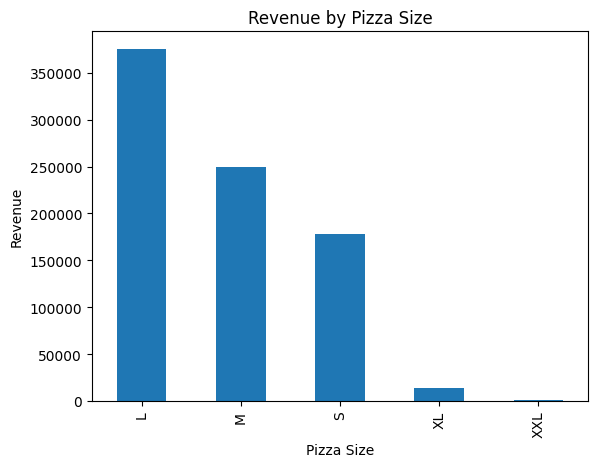

In [14]:
# REVENUE BY PIZZA SIZE
size_revenue = (df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False))

plt.figure()
size_revenue.plot(kind='bar')
plt.title("Revenue by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Revenue")
plt.show()

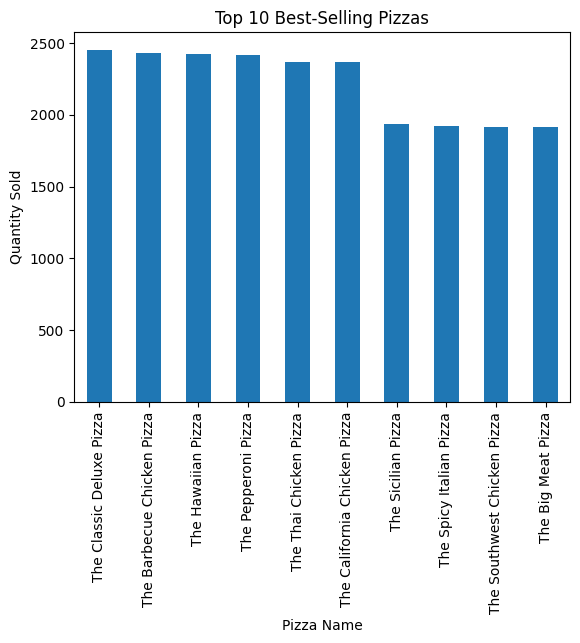

In [15]:
# TOP 10 BEST-SELLING PIZZAS
top_10_pizzas = (df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10))

plt.figure()
top_10_pizzas.plot(kind='bar')
plt.title("Top 10 Best-Selling Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.show()

In [16]:
# Create new time-based columns
df['month'] = df['order_date'].dt.month
df['day_name'] = df['order_date'].dt.day_name()

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,day_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,Thursday


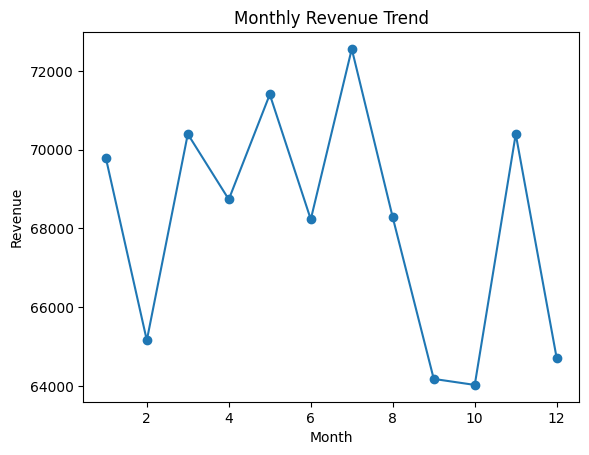

In [17]:
# MONTHLY REVENUE TREN
monthly_revenue = df.groupby('month')['total_price'].sum()

plt.figure()
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

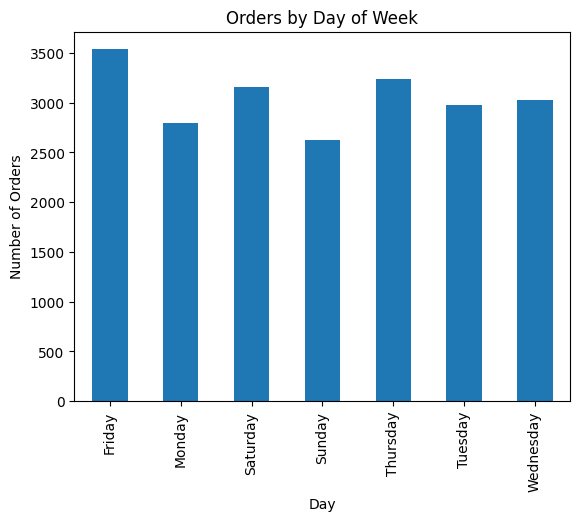

In [18]:
# ORDERS BY DAY OF WEEK
orders_by_day = df.groupby('day_name')['order_id'].nunique()

plt.figure()
orders_by_day.plot(kind='bar')
plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.show()

In [24]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Step 1: Connect to MySQL
username = "root"      
password = quote_plus("Dinesh@007") # the password you set during installation
host = "localhost"         # if running locally
port = "3306"              # default MySQl port
database = "pizza_sales_database"    # MySQL database

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into MySQl
table_name = "pizza_sales"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'pizza_sales' in database 'pizza_sales_database'.
